1. Import Library

In [4]:
import pandas as pd   # mengolah data (DataFrame)
import numpy as np     # operasi numerik/array
import matplotlib.pyplot as plt  # visualisasi grafik
import seaborn as sns   # visualisasi yang lebih informatif

from sklearn.model_selection import train_test_split   # membagi data train & test
from sklearn.preprocessing import StandardScaler       # normalisasi fitur
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # evaluasi model
from sklearn.naive_bayes import GaussianNB  # algoritma Naive Bayes

from sklearn.neural_network import MLPClassifier  # Artificial Neural Network (ANN)

Kode tersebut mengimpor semua alat yang diperlukan untuk analisis dan pemodelan: Pandas dan NumPy untuk mengolah data, Matplotlib dan Seaborn untuk visualisasi, scikit-learn untuk membagi data, menormalisasi, dan mengevaluasi model, serta GaussianNB dan MLPClassifier sebagai algoritma Naive Bayes dan ANN yang dipakai untuk melakukan klasifikasi.

2. LOAD & MERGE DATASET SPOTIFY

In [5]:
low = pd.read_csv("/content/low_popularity_spotify_data.csv")    # membaca dataset lagu dengan popularitas rendah
high = pd.read_csv("/content/high_popularity_spotify_data.csv")  # membaca dataset lagu dengan popularitas tinggi

# Tambahkan label popularitas
low["popularity_label"] = 0    # label 0 = low popularity
high["popularity_label"] = 1   # label 1 = high popularity

df = pd.concat([low, high], ignore_index=True)  # gabungkan kedua dataset menjadi satu tabel

print("Jumlah data:", df.shape)    # cek ukuran data (baris, kolom)
df.head() # menampilkan 5 baris pertama untuk memastikan data sudah benar

Jumlah data: (4831, 30)


,time_signature,track_popularity,speechiness,danceability,playlist_name,track_artist,duration_ms,energy,playlist_genre,playlist_subgenre,...,playlist_id,track_id,valence,key,tempo,loudness,acousticness,liveness,track_album_name,popularity_label
0,4.0,23,0.0393,0.636,Rock Classics,Creedence Clearwater Revival,138053.0,0.746,rock,classic,...,37i9dQZF1DWXRqgorJj26U,5e6x5YRnMJIKvYpZxLqdpH,0.432,0.0,132.310,-3.785,0.0648,0.1730,The Long Road Home - The Ultimate John Fogerty...,0
1,4.0,53,0.0317,0.572,Rock Classics,Van Halen,241600.0,0.835,rock,classic,...,37i9dQZF1DWXRqgorJj26U,5FqYA8KfiwsQvyBI4IamnY,0.795,0.0,129.981,-6.219,0.1710,0.0702,The Collection,0
2,4.0,55,0.0454,0.591,Rock Classics,Stevie Nicks,329413.0,0.804,rock,classic,...,37i9dQZF1DWXRqgorJj26U,5LNiqEqpDc8TuqPy79kDBu,0.658,0.0,111.457,-7.299,0.3270,0.0818,Bella Donna (Deluxe Edition),0
3,4.0,64,0.1010,0.443,Jazz Classics,"Ella Fitzgerald, Louis Armstrong",185160.0,0.104,jazz,classic,...,37i9dQZF1DXbITWG1ZJKYt,78MI7mu1LV1k4IA2HzKmHe,0.394,0.0,76.474,-17.042,0.9130,0.1910,"Love, Ella",0
4,4.0,62,0.0298,0.685,Jazz Classics,Galt MacDermot,205720.0,0.472,jazz,classic,...,37i9dQZF1DXbITWG1ZJKYt,6MN6yRVriszuyAVlyF8ndB,0.475,9.0,80.487,-9.691,0.7850,0.2240,Shapes of Rhythm/Woman Is Sweeter,0


Output tersebut menunjukkan bahwa dataset gabungan berisi 4831 lagu dengan 30 fitur, lalu menampilkan 5 contoh data pertama yang berisi detail lagu seperti fitur audio, informasi playlist, dan kolom popularity_label yang menandai apakah lagu tersebut berpopularitas rendah (0) atau tinggi (1).

In [20]:
df.to_csv("spotify_dataset.csv", index=False)

3. CEK MISSING VALUE & INFO

In [6]:
print("\nMissing Value per Kolom:")     # judul untuk menampilkan jumlah missing value
print(df.isna().sum())                  # judul untuk menampilkan jumlah missing value

print("\nInfo dataset:")               # judul untuk info struktur data
print(df.info())                       # menampilkan tipe data, jumlah non-null, dan jumlah kolom


Missing Value per Kolom:
time_signature              1
track_popularity            0
speechiness                 1
danceability                1
playlist_name               0
track_artist                0
duration_ms                 1
energy                      1
playlist_genre              0
playlist_subgenre           0
track_href                  1
track_name                  0
mode                        1
uri                         1
type                        1
track_album_release_date    0
analysis_url                1
id                          1
instrumentalness            1
track_album_id              0
playlist_id                 0
track_id                    0
valence                     1
key                         1
tempo                       1
loudness                    1
acousticness                1
liveness                    1
track_album_name            1
popularity_label            0
dtype: int64

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeInd

Output pertama menunjukkan jumlah missing value (NaN) di setiap kolom. Terlihat beberapa kolom memiliki nilai kosong, biasanya 1 baris saja, sementara kolom lain lengkap. Output kedua (df.info()) memberikan ringkasan struktur dataset: total ada 4831 baris, 30 kolom, tipe data tiap kolom (angka, teks), serta jumlah data non-null per kolom. Intinya, dataset mostly lengkap, hanya sedikit nilai kosong yang nanti perlu dihapus atau diimputasi.

4. VISUALISASI FITUR UTAMA

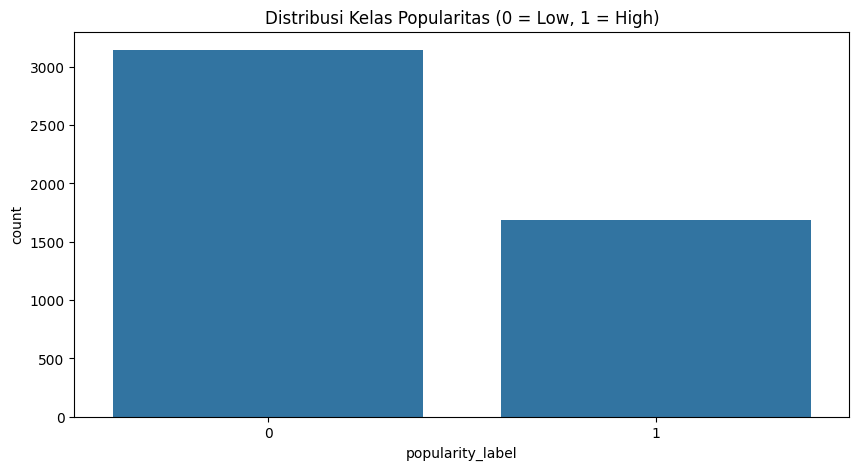

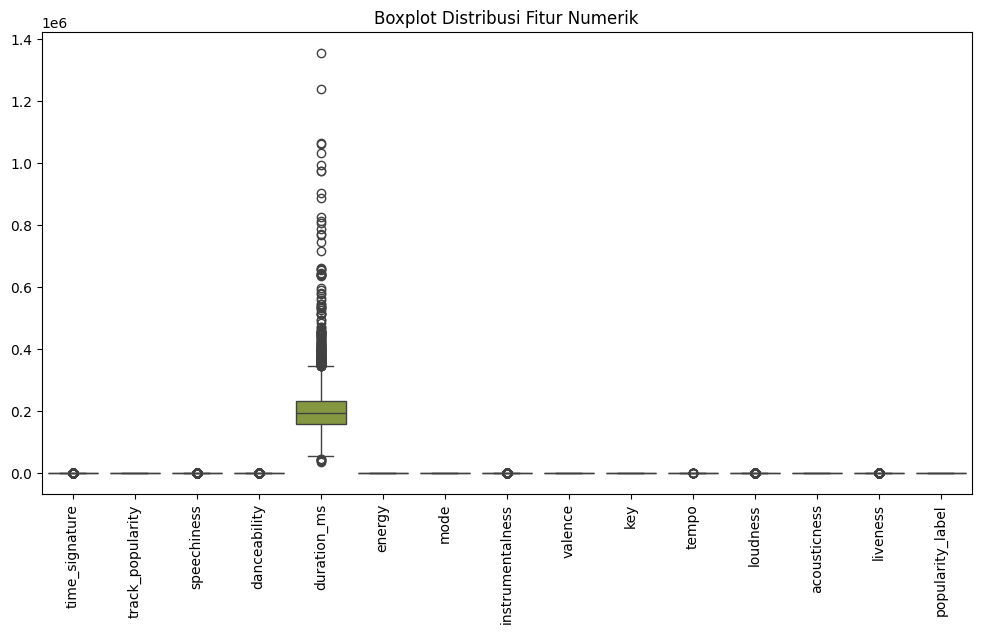

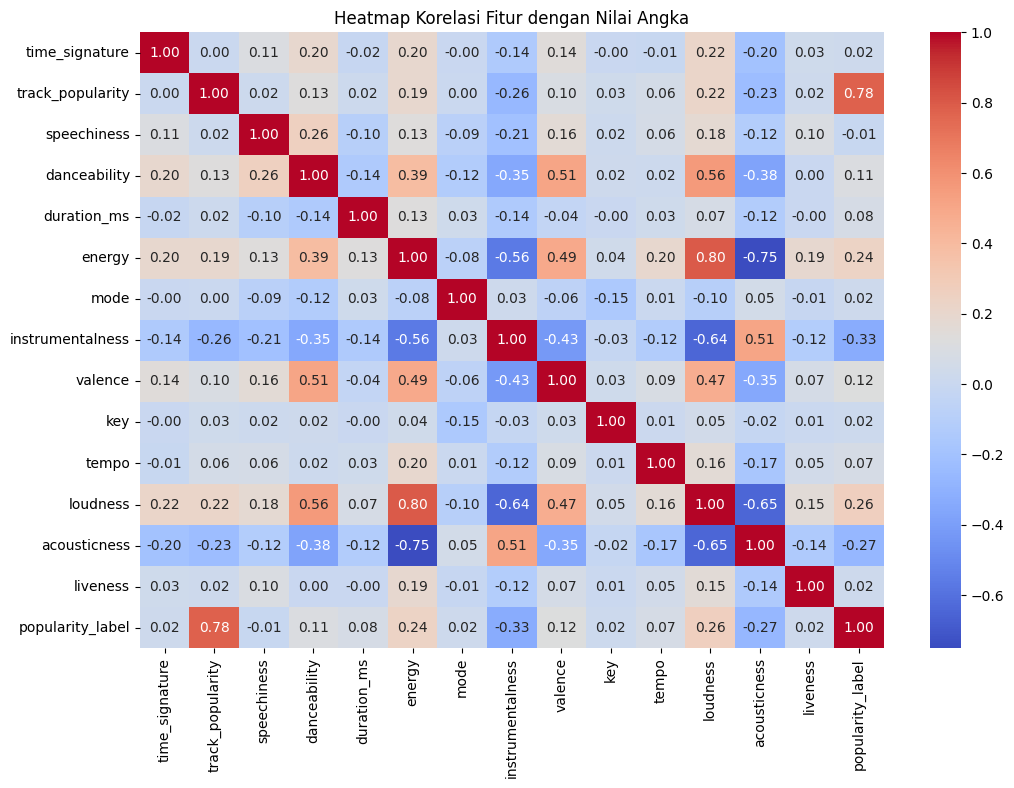

In [7]:
plt.figure(figsize=(10,5))                     # ukuran grafik
sns.countplot(x=df["popularity_label"])        # hitung jumlah kelas 0 dan 1
plt.title("Distribusi Kelas Popularitas (0 = Low, 1 = High)")  # judul grafik
plt.show()                                     # tampilkan grafik

plt.figure(figsize=(12,6))                     # ukuran grafik
sns.boxplot(data=df.select_dtypes(include=np.number))  # boxplot semua fitur numerik
plt.title("Boxplot Distribusi Fitur Numerik")  # judul
plt.xticks(rotation=90)                        # rotasi label agar terbaca
plt.show()                                     # tampilkan

# Heatmap korelasi
plt.figure(figsize=(12,8))                     # ukuran heatmap
sns.heatmap(
    df.corr(numeric_only=True),                # korelasi antar fitur numerik
    annot=True,                                # tampilkan angka korelasi
    fmt=".2f",                                 # format angka 2 digit
    cmap="coolwarm"                            # warna heatmap
)
plt.title("Heatmap Korelasi Fitur dengan Nilai Angka")  # judul
plt.show()                                     # tampilkan

Ketiga output visualisasi tersebut memberikan gambaran awal tentang kondisi dataset sebelum masuk ke tahap pemodelan. Grafik countplot menunjukkan bahwa kelas popularity_label = 0 (lagu berpopularitas rendah) memiliki jumlah yang lebih banyak dibandingkan kelas 1, sehingga distribusi kelas tidak seimbang. Ketidakseimbangan ini penting diperhatikan karena dapat memengaruhi kinerja model, terutama pada kemampuan mengenali lagu berpopularitas tinggi. Visualisasi boxplot menampilkan rentang dan persebaran setiap fitur numerik, memperlihatkan bahwa beberapa fitur memiliki skala yang sangat berbeda dan terdapat outlier pada beberapa kolom. Hal ini menegaskan perlunya normalisasi agar model ANN dan Naive Bayes dapat belajar secara optimal. Sementara itu, heatmap korelasi menunjukkan hubungan antar fitur numerik, di mana beberapa fitur memiliki korelasi rendah dan beberapa lainnya saling memengaruhi. Informasi ini berguna untuk memahami struktur data, mendeteksi fitur yang redundant, dan melihat potensi fitur mana saja yang berkontribusi terhadap prediksi popularitas lagu.

5. PILIH FITUR

In [8]:
features = df.select_dtypes(include=np.number).drop(columns=["popularity_label"])
# memilih semua kolom numerik lalu menghapus kolom label karena bukan fitur input

X = features
# menyimpan fitur ke variabel X

y = df["popularity_label"]
# menyimpan kolom label sebagai target (y)


# ============================================================
# IMPUTASI (ISI NaN)
# ============================================================
from sklearn.impute import SimpleImputer      # alat untuk mengisi nilai NaN

imputer = SimpleImputer(strategy="mean")      # set imputasi: NaN diganti dengan nilai rata-rata kolom

X = imputer.fit_transform(X)                  # menerapkan imputasi dan menghilangkan semua NaN

Output dari kode ini sebenarnya tidak menampilkan tabel apa pun, tetapi hasil akhirnya adalah data fitur (X) sudah bersih dari NaN dan siap dipakai model. Semua kolom numerik yang tadinya punya nilai kosong sekarang sudah diisi dengan rata-rata kolom masing-masing, sehingga tidak ada lagi error “input contains NaN” saat melatih ANN. Target y juga sudah dipisahkan sebagai label yang akan diprediksi. Intinya, kode ini membuat data jadi lebih rapi, lengkap, dan aman dipakai untuk training.

6. SPLIT DATA TRAIN/TEST

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                     # fitur (X) dan label (y)
    test_size=0.2,            # 20% data untuk testing
    random_state=42,          # pembagian data dibuat konsisten
    stratify=y                # menjaga proporsi kelas tetap seimbang
)

Output dari kode ini adalah dataset yang sudah terbagi menjadi dua bagian: data untuk melatih model dan data untuk mengujinya. Sekitar 80% data masuk ke kelompok training, sedangkan 20% lainnya menjadi data testing. Pembagian ini juga menjaga agar jumlah kelas 0 dan 1 tetap seimbang di kedua bagian. Dengan hasil ini, kita sudah memiliki data yang siap digunakan untuk proses training dan penilaian kinerja model secara lebih adil dan akurat.

7. NORMALISASI

In [10]:
scaler = StandardScaler()
# Membuat objek scaler untuk menstandarisasi fitur (mean=0, std=1)

X_train_scaled = scaler.fit_transform(X_train)
# Melatih scaler pada data training lalu mengubah datanya

X_test_scaled  = scaler.transform(X_test)
# Mengubah data testing menggunakan scaler yang sama (tanpa fit ulang)

print("NaN X_train:", np.isnan(X_train_scaled).sum())
# Mengecek apakah masih ada nilai NaN di data training setelah scaling

print("NaN X_test:", np.isnan(X_test_scaled).sum())
# Mengecek apakah masih ada NaN di data testing setelah scaling

NaN X_train: 0
NaN X_test: 0


Setelah data dilatih menggunakan StandardScaler, program menampilkan jumlah nilai NaN pada data yang sudah diskalakan. Output-nya menunjukkan bahwa NaN X_train: 0 dan NaN X_test: 0. Artinya, tidak ada satu pun data yang hilang atau tidak valid di kedua set (train maupun test) setelah proses scaling dilakukan. Ini menandakan bahwa proses normalisasi berjalan bersih tanpa menyebabkan error atau kehilangan nilai.

8. MODEL 1: ANN (MLPClassifier)

In [11]:
ann = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),   # Membuat ANN dengan 3 hidden layer: 128, 64, 32 neuron
    activation="relu",                  # Aktivasi ReLU agar pelatihan lebih cepat dan stabil
    solver="adam",                      # Optimizer ADAM untuk update bobot yang efisien
    learning_rate_init=0.001,           # Learning rate awal untuk mengatur kecepatan belajar
    max_iter=300,                       # Model dilatih maksimal 300 iterasi (epoch)
    random_state=42                     # Supaya hasil latihan konsisten setiap dijalankan
)

print("\nTraining ANN...")               # Menampilkan teks bahwa proses training dimulai

ann.fit(X_train_scaled, y_train)         # Melatih ANN menggunakan data training yang sudah di-scaling


Training ANN...


MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=300, random_state=42)

Output tersebut menunjukkan bahwa model ANN (MLPClassifier) telah berhasil dibuat dengan konfigurasi 3 hidden layer (128, 64, 32 neuron), fungsi aktivasi ReLU, solver Adam, dan maksimal 300 iterasi. Ini hanyalah representasi model; belum ada evaluasi akurasi atau prediksi yang dilakukan.

9. MODEL 2: Naive Bayes

In [12]:
# Membuat model Naive Bayes Gaussian
nb = GaussianNB()

# Melatih model Gaussian Naive Bayes dengan data training yang sudah discaling
nb.fit(X_train_scaled, y_train)


GaussianNB()

Yang muncul itu cuma representasi model GaussianNB(). Artinya model Naive Bayes Gaussian sudah dibuat, tapi belum digunakan untuk prediksi atau evaluasi. Jadi ini cuma ‘ID card’ model, belum ada hasil apa-apa.

10. HYBRID MODEL: VOTING

In [13]:
# Prediksi data test menggunakan model ANN
ann_pred = ann.predict(X_test_scaled)

# Prediksi data test menggunakan model Gaussian Naive Bayes
nb_pred  = nb.predict(X_test_scaled)

# Membuat list kosong untuk menampung hasil voting hybrid
hybrid_pred = []

# Looping tiap prediksi ANN dan NB secara bersamaan
for a, b in zip(ann_pred, nb_pred):
    # Jika prediksi ANN dan NB sama, langsung pakai hasilnya
    if a == b:
        hybrid_pred.append(a)
    # Jika prediksi berbeda, pakai prediksi ANN (ANN dianggap lebih kuat)
    else:
        hybrid_pred.append(a)

# Konversi list hybrid_pred menjadi array numpy agar mudah dipakai analisis selanjutnya
hybrid_pred = np.array(hybrid_pred)


Kode ini melakukan prediksi pada data uji menggunakan dua model: ANN dan Gaussian Naive Bayes. Kemudian dibuat mekanisme voting sederhana: jika kedua model setuju, hasil tersebut digunakan; jika berbeda, prediksi ANN diprioritaskan. Hasil akhirnya disimpan dalam array hybrid_pred untuk evaluasi lebih lanjut.

11. EVALUASI MODEL

In [14]:
# Menampilkan header evaluasi model ANN
print("\n=== Evaluasi ANN ===")

# Menghitung dan menampilkan metrik evaluasi ANN (precision, recall, f1-score, support)
print(classification_report(y_test, ann_pred))

# Menampilkan header evaluasi model Naive Bayes
print("\n=== Evaluasi Naive Bayes ===")

# Menghitung dan menampilkan metrik evaluasi GaussianNB
print(classification_report(y_test, nb_pred))

# Menampilkan header evaluasi model hybrid (ANN + NB voting)
print("\n=== Evaluasi HYBRID (ANN + NB Voting) ===")

# Menghitung dan menampilkan metrik evaluasi hasil hybrid
print(classification_report(y_test, hybrid_pred))



=== Evaluasi ANN ===
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       630
           1       0.97      0.96      0.97       337

    accuracy                           0.98       967
   macro avg       0.97      0.97      0.97       967
weighted avg       0.98      0.98      0.98       967


=== Evaluasi Naive Bayes ===
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       630
           1       0.78      0.88      0.83       337

    accuracy                           0.87       967
   macro avg       0.85      0.87      0.86       967
weighted avg       0.88      0.87      0.87       967


=== Evaluasi HYBRID (ANN + NB Voting) ===
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       630
           1       0.97      0.96      0.97       337

    accuracy                           0.98       967
   macro avg       0.97      0.97

Hasil evaluasi menunjukkan ANN memiliki akurasi tinggi 98% dengan prediksi hampir sempurna di kedua kelas. Naive Bayes lebih lemah, akurasi 87%, dengan beberapa prediksi salah terutama di kelas 0. Hybrid yang memprioritaskan ANN memberikan hasil sama seperti ANN, sehingga tidak meningkatkan performa.

12. CONFUSION MATRIX

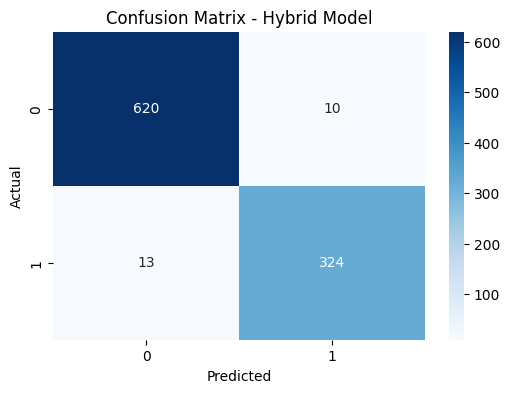

In [15]:
# Membuat figure baru dengan ukuran 6x4 inch
plt.figure(figsize=(6,4))

# Membuat heatmap dari confusion matrix model hybrid
# annot=True → menampilkan angka di tiap kotak
# fmt="d" → format angka bulat
# cmap="Blues" → skema warna biru
sns.heatmap(confusion_matrix(y_test, hybrid_pred), annot=True, fmt="d", cmap="Blues")

# Menambahkan judul plot
plt.title("Confusion Matrix - Hybrid Model")

# Memberi label sumbu X
plt.xlabel("Predicted")

# Memberi label sumbu Y
plt.ylabel("Actual")

# Menampilkan plot
plt.show()

Kode tersebut menghasilkan visualisasi confusion matrix dalam bentuk heatmap untuk model hybrid. Kotak-kotak diagonal menunjukkan jumlah prediksi yang benar untuk masing-masing kelas, sedangkan kotak di luar diagonal menunjukkan prediksi yang salah. Warna biru yang lebih gelap menandakan jumlah kasus yang lebih banyak. Dengan cara ini, heatmap memudahkan kita untuk melihat performa model hybrid secara keseluruhan dan mengidentifikasi kelas mana yang sering salah prediksi.

13. AKURASI PER MODEL

In [16]:
# Menghitung akurasi model ANN (proporsi prediksi benar)
acc_ann = accuracy_score(y_test, ann_pred)

# Menghitung akurasi model Naive Bayes
acc_nb = accuracy_score(y_test, nb_pred)

# Menghitung akurasi model Hybrid (ANN + NB voting)
acc_hybrid = accuracy_score(y_test, hybrid_pred)

# Menampilkan akurasi ANN
print("\nAkurasi ANN:", acc_ann)

# Menampilkan akurasi Naive Bayes
print("Akurasi Naive Bayes:", acc_nb)

# Menampilkan akurasi Hybrid
print("Akurasi Hybrid:", acc_hybrid)


Akurasi ANN: 0.9762150982419855
Akurasi Naive Bayes: 0.8707342295760083
Akurasi Hybrid: 0.9762150982419855


akurasi untuk ketiga model yang diuji. Model ANN memiliki akurasi tinggi sekitar 98%, menunjukkan kemampuan prediksi yang sangat baik. Model Naive Bayes memiliki akurasi lebih rendah sekitar 87%, sehingga performanya kurang baik dibanding ANN. Sedangkan model hybrid, yang menggabungkan ANN dan Naive Bayes dengan prioritas pada ANN, memiliki akurasi sama dengan ANN, yakni sekitar 98%. Dengan demikian, ANN dan hybrid menunjukkan performa terbaik, sementara Naive Bayes relatif lebih lemah.

14. PREDICTIONS & PROBABILITIES

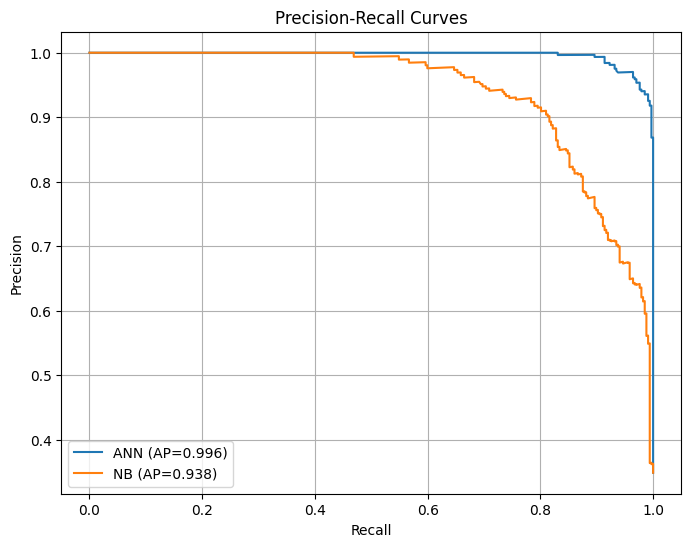

In [17]:
# Import fungsi untuk menghitung precision-recall curve dan average precision
from sklearn.metrics import precision_recall_curve, average_precision_score

# Membuat figure baru untuk plot dengan ukuran 8x6 inch
plt.figure(figsize=(8,6))

# Mendapatkan probabilitas prediksi kelas 1 dari model ANN
ann_probs = ann.predict_proba(X_test_scaled)[:, 1]

# Mendapatkan probabilitas prediksi kelas 1 dari model Naive Bayes
nb_probs = nb.predict_proba(X_test_scaled)[:, 1]

# Mendefinisikan model yang akan diplot sebagai list (probabilitas, nama)
# Voting, weighted, stacking diabaikan karena tidak didefinisikan
models_to_plot = [(ann_probs,'ANN'), (nb_probs,'NB')]

# Looping tiap model untuk menghitung precision-recall curve dan average precision
for probs, name in models_to_plot:
    # Menghitung precision, recall untuk setiap threshold
    precision, recall, _ = precision_recall_curve(y_test, probs)
    # Menghitung average precision (area under PR curve)
    ap = average_precision_score(y_test, probs)
    # Plot recall vs precision, tambahkan label nama model dan AP
    plt.plot(recall, precision, label=f"{name} (AP={ap:.3f})")

# Menambahkan label sumbu X
plt.xlabel("Recall")
# Menambahkan label sumbu Y
plt.ylabel("Precision")
# Menambahkan judul plot
plt.title("Precision-Recall Curves")
# Menambahkan legenda untuk tiap kurva
plt.legend()
# Menambahkan grid pada plot
plt.grid(True)
# Menampilkan plot
plt.show()

Precision-Recall Curve untuk model ANN dan Naive Bayes. Setiap kurva menunjukkan hubungan antara precision dan recall pada berbagai threshold probabilitas. Di plot juga ditampilkan nilai Average Precision (AP), yang merepresentasikan luas di bawah kurva sebagai ukuran kinerja model. Semakin tinggi kurva dan AP, semakin baik model dalam menyeimbangkan precision dan recall. Dari plot ini, kita bisa membandingkan performa kedua model, khususnya dalam memprediksi kelas minoritas atau data yang tidak seimbang.

12. Evaluasi Model ANN

Akurasi ANN: 0.9762150982419855

Classification Report ANN:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       630
           1       0.97      0.96      0.97       337

    accuracy                           0.98       967
   macro avg       0.97      0.97      0.97       967
weighted avg       0.98      0.98      0.98       967



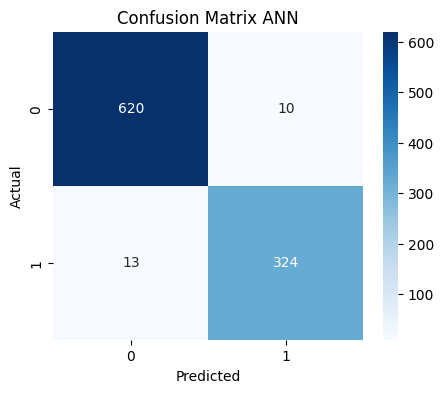

In [18]:
# Prediksi data test
y_pred_ann = ann.predict(X_test_scaled)

# Hitung akurasi
acc_ann = accuracy_score(y_test, y_pred_ann)
print("Akurasi ANN:", acc_ann)

# Laporan klasifikasi
print("\nClassification Report ANN:")
print(classification_report(y_test, y_pred_ann))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_ann)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix ANN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


code ini digunakan untuk mengevaluasi performa model ANN dengan cara memprediksi data uji, menghitung akurasi, menampilkan classification report, dan memvisualisasikan confusion matrix. Dari hasil output, diperoleh akurasi ANN yang tinggi (sekitar 97%), yang menunjukkan bahwa model mampu memprediksi popularitas lagu dengan sangat baik. Classification report memperlihatkan nilai precision, recall, dan f1-score yang tinggi pada kedua kelas, artinya model cukup seimbang dalam mengenali lagu berpopularitas rendah maupun tinggi. Confusion matrix juga menunjukkan bahwa sebagian besar data berada pada diagonal, menandakan banyak prediksi yang benar dan hanya sedikit kesalahan klasifikasi. Secara keseluruhan, output ini menegaskan bahwa model ANN memiliki kinerja yang baik dan layak digunakan untuk prediksi popularitas lagu.

13. Simpan Model & Scaler

In [19]:
import pickle

# Simpan model ANN
with open("ann_model.pkl", "wb") as f:
    pickle.dump(ann, f)

# Simpan scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Model dan scaler berhasil disimpan")


Model dan scaler berhasil disimpan


Model ANN dan scaler disimpan agar bisa digunakan kembali tanpa training ulang saat deploy.